# Computational physics P452 endsem

### Chandan Kumar Sahu
### Roll No. 1911055

In [1]:
import math
import matplotlib.pyplot as plt
from Chandan_Library_Endsem import *
import warnings
warnings.filterwarnings("ignore")


# Question 1


Lifetime: 473.56675752523284 ± 55.28239131380527
Chi square: 17.500389771867532
The fit is not acceptable at 95% level of significance.


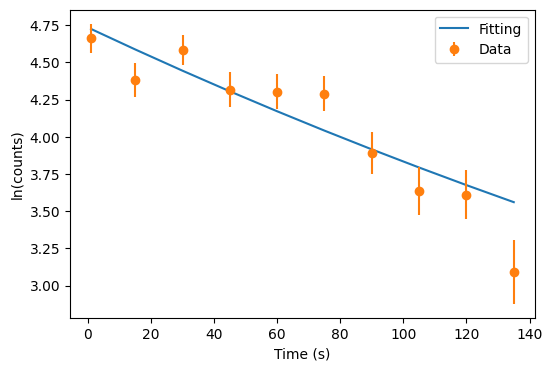

In [2]:
time, counts, uncertainties = np.genfromtxt('endsemfit.txt', unpack=True)

# Define the exponential decay function
def func(t, a, b):
	return a * np.exp(-b * t)

# Convert counts to natural logarithm and calculate its uncertainty
ln_counts = np.log(counts)
sigma_ln_counts = 1 / np.sqrt(counts)

# Use curve_fit to fit the exponential decay function to the data
popt, pcov = curve_fit(func, time, ln_counts, sigma=sigma_ln_counts, absolute_sigma=True)
intercept, slope = popt
covariant_matrix = pcov

# Calculate the lifetime and its error
lifetime = 1 / slope
error_lifetime = np.sqrt(np.diag(covariant_matrix))[1] / slope**2

# Calculate the chi-square statistic and the reduced chi-square statistic
chi_square = np.sum(((ln_counts - func(time, *popt)) / sigma_ln_counts) ** 2)

critical_chi_square = 16.919

print('Lifetime:', lifetime, '±', error_lifetime)
print('Chi square:', chi_square)

# Determine if fit is acceptable at 95% level of significance
if chi_square < critical_chi_square:
    print("The fit is acceptable at 95% level of significance.")
else:
    print("The fit is not acceptable at 95% level of significance.")

# Plot the data and the fit
plt.figure(figsize=(6, 4))
fit = func(time, *popt)
fit = np.array(fit)
plt.plot(time, fit, label='Fitting')
plt.errorbar(time, ln_counts, yerr=sigma_ln_counts, fmt='o', label='Data')
plt.xlabel('Time (s)')
plt.ylabel('ln(counts)')
plt.legend()
plt.show()


# Soumik's

Intercept:  4.731434285337495
Slope:  -0.00925719196078415
Chi square:  15.170840594562922

Average Life-time:  108.02411835427607 ± 11.84012928651513 sec
The fit is acceptable at 95% level of significance.


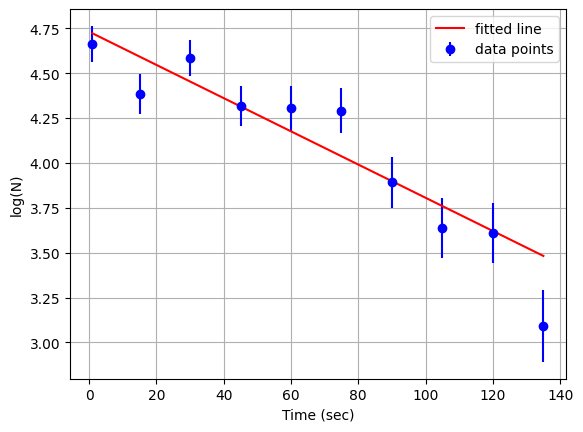

In [3]:
import math

# Define functions
def chi2_linear_regression(xvals, yvals, sigma_lst):
    n = len(xvals)
    s, sx, sy, sxx, sxy = 0, 0, 0, 0, 0
    for i in range(n):
        s += 1 / sigma_lst[i]**2
        sx += xvals[i] / sigma_lst[i]**2
        sy += yvals[i] / sigma_lst[i]**2
        sxx += xvals[i]**2 / sigma_lst[i]**2
        sxy += xvals[i]*yvals[i] / sigma_lst[i]**2

    delta = s*sxx - sx**2
    a = (sxx*sy - sx*sxy) / delta
    b = (s*sxy - sx*sy) / delta

    chi2 = 0
    for i in range(n):                          
        chi2 += (yvals[i] - a - b*xvals[i])**2 / sigma_lst[i]**2

    # Calculate errors or standard deviations in parameters a and b
    delA2 = sxx / delta
    delB2 = s / delta
    cov = -sx / delta
    
    # Calculate standard deviations in parameters a and b
    std_dev_a = math.sqrt(delA2)
    std_dev_b = math.sqrt(delB2)
    
    return a, b, std_dev_a, std_dev_b, cov, chi2


def half_life(a0, k):
    return a0 / (2 * abs(k))

# Read data from file
with open("endsemfit.txt", "r") as file:
    lines = file.readlines()

time_lst, count_lst, sigma_lst = [], [], []
for line in lines:
    line_data = line.strip().split()
    time_lst.append(float(line_data[0]))
    count_lst.append(float(line_data[1]))
    sigma_lst.append(float(line_data[2]))

# Calculate logarithms and inverse of sigma
log_count_lst, new_sigma_lst = [], []
for i in range(len(count_lst)):
    log_count_lst.append(math.log(count_lst[i]))
    new_sigma_lst.append(1/sigma_lst[i])

# Perform linear regression
params = chi2_linear_regression(xvals=time_lst, yvals=log_count_lst, sigma_lst=new_sigma_lst)

a, b, std_dev_a, std_dev_b, cov, calculate_chi_square = params

# Print results
print("Intercept: ", params[0])
print("Slope: ", params[1])
print("Chi square: ", params[-1])

# Calculate fitted values
calc_val = []
for i in time_lst:
    calc_val.append(i*params[1] + params[0])

# Print half-life
print()
print("Average Life-time: ", 1/abs(params[1]), "±", params[3]/abs(params[1])**2, "sec")

critical_chi_square = 16.919

# Determine if fit is acceptable at 95% level of significance
if calculate_chi_square < critical_chi_square:
    print("The fit is acceptable at 95% level of significance.")
else:
    print("The fit is not acceptable at 95% level of significance.")

# Plot data and fitted line
import matplotlib.pyplot as plt

plt.errorbar(time_lst, log_count_lst, yerr=new_sigma_lst, label='data points', marker='o', fmt='', linestyle='', color='b')
plt.plot(time_lst, calc_val,'r', label='fitted line')
plt.xlabel("Time (sec)")
plt.ylabel("log(N)")

plt.legend()
plt.grid()
plt.show()


# Mine

Chi-square statistic: 17.891415256354072
Degrees of freedom: 9
Chi square: 17.891415256354072
The fit is not acceptable at 95% level of significance.

Decay constant: 0.010377476668031122
Error in decay constant: 0.0013122299576723022
96.36253898605258 12.185024789735728
Lifetime of the species: 96.36253898605258
Error in lifetime: 12.185024789735728


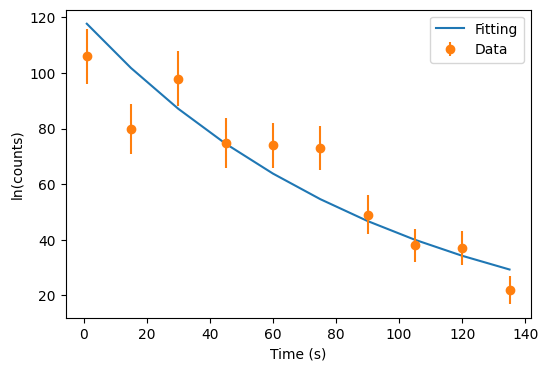

In [4]:

def exponential_decay(x, a, b):
    return a * np.exp(-b * x)

def Line_fit(X, Y):
    n = len(X) # or len(Y)
    xbar = sum(X)/n
    ybar = sum(Y)/n

    # Calculating numerator and denominator
    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    # calculation of slope and intercept
    m = numer / denum
    c = ybar - m * xbar
    
    # Calculation of error in the slope
    std_dev_residuals = np.sqrt(sum(( Y - (c + m*X) )**2) / (n - 2))
    std_dev_x = np.sqrt(sum([(xi - xbar)**2 for xi in X]) / (n - 1))
    slope_error = std_dev_residuals / (std_dev_x * np.sqrt(n))
    
    return c, m, slope_error

def calculate_expected_frequencies(x, y):
    log_y = np.log(y)
    intercept, slope, error = Line_fit(x, log_y)
    expected_frequencies = np.exp(intercept + slope * x)
    return expected_frequencies

def calculate_chi_square(x, observed, std_dev):
    expected = calculate_expected_frequencies(x, observed)
    chi_square = np.sum(((observed - expected) / std_dev)**2)
    df = len(observed) - 1  # degrees of freedom
    return chi_square, df

# Example usage:
x, observed, std_dev = np.genfromtxt('endsemfit.txt', unpack=True)
chi_square, degrees_of_freedom = calculate_chi_square(x, observed, std_dev)
print("Chi-square statistic:", chi_square)
print("Degrees of freedom:", degrees_of_freedom)

critical_chi_square = 16.919

# print('Lifetime:', lifetime, '±', error_lifetime)
print('Chi square:', chi_square)

# Determine if fit is acceptable at 95% level of significance
if chi_square < critical_chi_square:
    print("The fit is acceptable at 95% level of significance.")
else:
    print("The fit is not acceptable at 95% level of significance.")

expected = calculate_expected_frequencies(x, observed)

print()

def calculate_lifetime_and_error(slope, slope_error):
    decay_constant = -slope
    lifetime = 1 / decay_constant
    lifetime_error = slope_error / (decay_constant ** 2)
    
    print("Decay constant:", decay_constant)
    print("Error in decay constant:", slope_error)
    print(lifetime, lifetime_error)
    return lifetime, lifetime_error

log_observed = np.log(observed)
intercept, slope, error = Line_fit(x, log_observed)
lifetime, lifetime_error = calculate_lifetime_and_error(slope, error)
print("Lifetime of the species:", lifetime)
print("Error in lifetime:", lifetime_error)

# Plot the data and the fit
plt.figure(figsize=(6, 4))
# fit = exponential_decay(x, c, -m)
# fit = np.array(fit)
plt.plot(x, expected, label='Fitting')
plt.errorbar(x, observed, yerr=std_dev, fmt='o', label='Data')
plt.xlabel('Time (s)')
plt.ylabel('ln(counts)')
plt.legend()
plt.show()


Lifetime: 107.08728053794634 ± 10.52802324235081


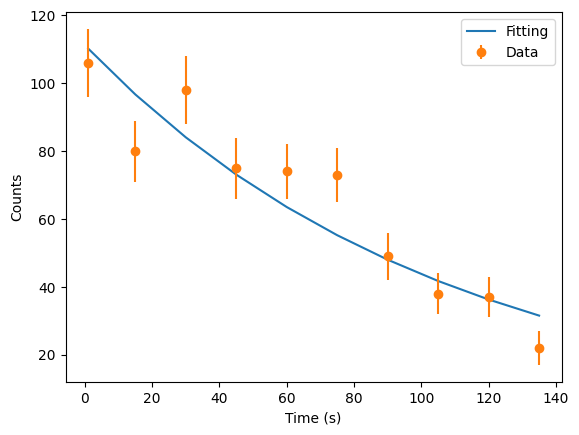

In [5]:
from scipy.optimize import curve_fit

x, observed, std_dev = np.genfromtxt('endsemfit.txt', unpack=True)

def exponential_decay(x, a, b):
    return a * np.exp(-b * x)

popt, pcov = curve_fit(exponential_decay, x, observed, sigma=std_dev, absolute_sigma=True)
intercept, slope = popt
covariant_matrix = pcov

lifetime = 1 / slope
error_lifetime = np.sqrt(np.diag(covariant_matrix))[1] / slope**2

print('Lifetime:', lifetime, '±', error_lifetime)

plt.plot(x, exponential_decay(x, *popt), label='Fitting')
plt.errorbar(x, observed, yerr=std_dev, fmt='o', label='Data')
plt.xlabel('Time (s)')
plt.ylabel('Counts')
plt.legend()
plt.show()


Lifetime: 96.36253898605258 ± 9.665857555117992e-14


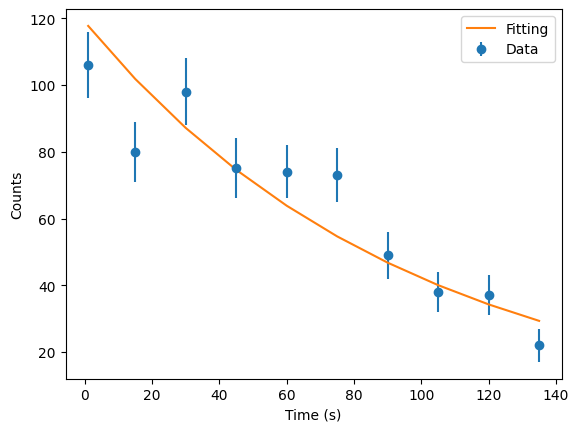

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define your own linear fit function
def Line_fit(X, Y):
    n = len(X)
    xbar = sum(X) / n
    ybar = sum(Y) / n

    # Calculating numerator and denominator
    numer = sum([xi * yi for xi, yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi ** 2 for xi in X]) - n * xbar ** 2

    # calculation of slope and intercept
    m = numer / denum
    c = ybar - m * xbar

    # Error calculation for slope (m)
    residual = [yi - (m * xi + c) for xi, yi in zip(X, Y)]
    error_slope = np.sqrt(sum(residual) ** 2 / (n - 2)) / np.sqrt(sum([(xi - xbar) ** 2 for xi in X]))

    return c, m, error_slope

# Load data
x, observed, std_dev = np.genfromtxt('endsemfit.txt', unpack=True)

# Define the linear decay function
def linear_decay(x, a, b):
    return a * x + b

# Transform the observed data to log scale
log_observed = np.log(observed)

# Perform curve fitting with linear function on log-transformed data
intercept, slope, error_slope = Line_fit(x, log_observed)

# Calculate lifetime and its error
lifetime = -1 / slope
error_lifetime = error_slope / (slope ** 2)

# Print results
print('Lifetime:', lifetime, '±', error_lifetime)

# Plotting
plt.errorbar(x, observed, yerr=std_dev, fmt='o', label='Data')
plt.plot(x, np.exp(linear_decay(x, slope, intercept)), label='Fitting')
plt.xlabel('Time (s)')
plt.ylabel('Counts')
plt.legend()
plt.show()


# Question 2


In [7]:
# Define the function g(x), this has to be input by the user
def g1(V):
    T = 300
    p = 5.95
    R = 0.0821
    a = 6.254
    b = 0.05422
    return R*T/(p+(a/(V**2))) + b

initial_guess = 1.0
eps=1e-6
root, Num_iter = fixed_point_method(g1, initial_guess, eps)

print(f"Root of the given equation: {ROUND(root, 5)}")
print(f"Number of iterations performed: {Num_iter}")
print()

# Define the function g(x), this has to be input by the user
def g2(V):
    T = 300
    p = 5.95
    R = 0.0821
    a = 6.254
    b = 0.05422
    return math.sqrt(a/(R*T/(V-b) - p))

initial_guess = 1.0
eps=1e-6
root, Num_iter = fixed_point_method(g2, initial_guess, eps)

print(f"Root of the given equation: {ROUND(root, 5)}")
print(f"Number of iterations performed: {Num_iter}")


Root of the given equation: 3.92995
Number of iterations performed: 10

Root of the given equation: 0.18566
Number of iterations performed: 36


# Question 3
Done in answer sheet


# Question 4
Done in answer sheet

# Question 5



In [8]:
matrix = np.loadtxt('endsemmat.txt')

print("Matrix:")
print(matrix)
print()

# Get the first two largest eigenvalues and their corresponding eigenvectors
eigenvalues = []
eigenvectors = []
matrix_n = matrix
for _ in range(2):
    eigenvalue, eigenvector = power_method_AR(matrix_n, 1000)
    eigenvalues.append(eigenvalue)
    eigenvectors.append(eigenvector)
    # Deflate the matrix
    matrix_n = matrix_n - eigenvalue * np.outer(eigenvector, eigenvector)

# # Print the eigenvalues and eigenvectors
# print("Calculated Eigenvalues and Eigenvectors:\n")
# for i in range(2):
#     print(f"Eigenvalue {i+1}: {eigenvalues[i]}")
#     print(f"Eigenvector {i+1}: {eigenvectors[i]}")
#     print()

# Constants
a = c = -1
b = 2
n = 5

# Calculate expected eigenvalues and eigenvectors
expected_eigenvalues = [b + 2 * np.sqrt(a * c) * np.cos(k * np.pi / (n + 1)) for k in range(1, 6)]
expected_eigenvectors = [[2 * (np.sqrt(c / a))**k * np.sin(i * k * np.pi / (n + 1)) for i in range(1, n + 1)] for k in range(1, 6)]

# Normalizing 
expected_eigenvectors = np.array(expected_eigenvectors)
expected_eigenvectors = expected_eigenvectors / np.linalg.norm(expected_eigenvectors, axis=1)[:, np.newaxis]


print("Comparison with expected values:\n")
# Print the expected and computed eigenvalues and eigenvectors
for i in range(2):
	print(f"Expected eigenvalue {i+1}: {np.round(expected_eigenvalues[i],6)}")
	print(f"Computed eigenvalue {i+1}: {np.round(eigenvalues[i],6)}")
	print()
	print(f"Expected eigenvector {i+1}: {np.round(expected_eigenvectors[i],6)}")
	print(f"Computed eigenvector {i+1}: {np.round(eigenvectors[i],6)}")
	print()

Matrix:
[[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  2.]]

Comparison with expected values:

Expected eigenvalue 1: 3.732051
Computed eigenvalue 1: 3.732051

Expected eigenvector 1: [0.288675 0.5      0.57735  0.5      0.288675]
Computed eigenvector 1: [-0.288675  0.5      -0.57735   0.5      -0.288675]

Expected eigenvalue 2: 3.0
Computed eigenvalue 2: 3.0

Expected eigenvector 2: [ 0.5  0.5  0.  -0.5 -0.5]
Computed eigenvector 2: [-0.5  0.5  0.  -0.5  0.5]



# Question 6

Probability of getting success: 0.48468868445797264


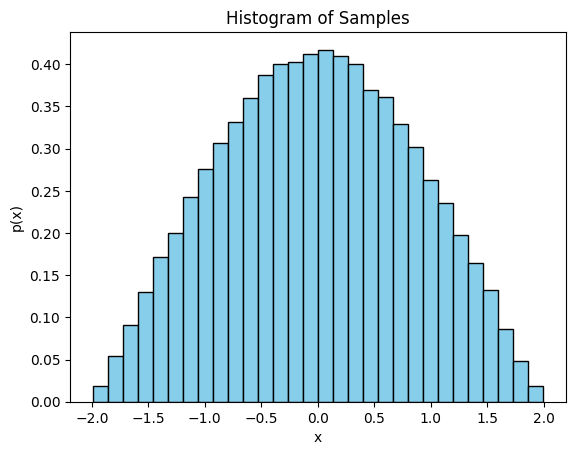

Success probability: 0.7900


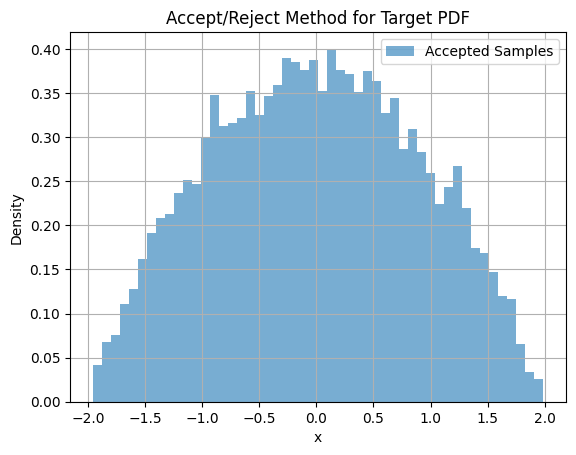

In [9]:
a = 2
N = 100000

# Target distribution
def p(x):
	return 0.5 * (a**2 - x**2) if abs(x) < a else 0

# Generate samples
samples = []
num_rejected = 0
while len(samples) < N:
	# sample from Gaussian distribution
	x = np.random.normal(0, a)  
	# uniform random number
	u = np.random.uniform(0, 0.5 * a**2)
	if u < p(x):
		samples.append(x)
	else:
		num_rejected += 1

# Print success probability
print(f"Probability of getting success: {N / (N + num_rejected)}")

# Plot histogram of samples
plt.hist(samples, bins=30, density=True, color='skyblue', edgecolor='black')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Histogram of Samples')
plt.show()

#########################################################

import numpy as np
import matplotlib.pyplot as plt

# Define the target pdf p(x) = 0.5(a^2 - x^2) for |x| < a, where a = 2
def target_pdf(x):
    a = 2
    if abs(x) < a:
        return 0.5 * (a**2 - x**2)
    else:
        return 0

# Define the Gaussian proposal distribution g(x)
def proposal_pdf(x, mu, sigma):
    return np.exp(-(x - mu)**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))

# Parameters for the proposal distribution
mu = 0  # Mean
sigma = 1  # Standard deviation

# Number of samples to generate
num_samples = 10000

# Generate samples using the proposal distribution
samples = np.random.normal(mu, sigma, num_samples)

# Calculate the acceptance ratio p(x) / (C * g(x))
C = max(target_pdf(x) / proposal_pdf(x, mu, sigma) for x in samples)

# Generate uniform random numbers
uniform_samples = np.random.uniform(0, 1, num_samples)

# Accept or reject samples based on the acceptance ratio
accepted_samples = [x for x, u in zip(samples, uniform_samples) if u < target_pdf(x) / (C * proposal_pdf(x, mu, sigma))]

# Calculate success probability
success_probability = len(accepted_samples) / num_samples

print(f"Success probability: {success_probability:.4f}")

# Plot the accepted samples
plt.hist(accepted_samples, bins=50, density=True, alpha=0.6, label="Accepted Samples")
x_vals = np.linspace(-2, 2, 1000)
# plt.plot(x_vals, [target_pdf(x)/4 for x in x_vals], color="red", label="Target PDF")
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Accept/Reject Method for Target PDF")
plt.legend()
plt.grid()
plt.show()

Success probability: 0.7808


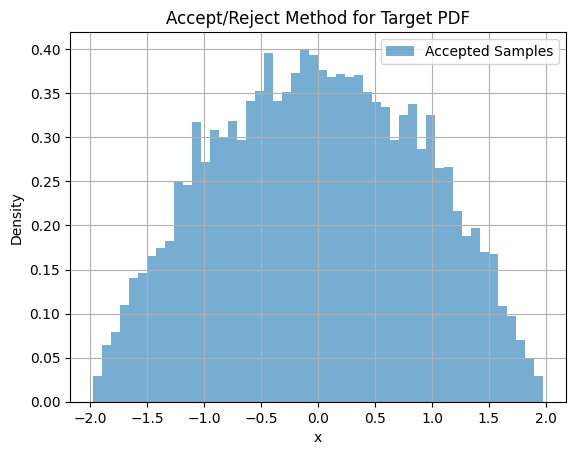

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target pdf p(x) = 0.5(a^2 - x^2) for |x| < a, where a = 2
def target_pdf(x):
    a = 2
    if abs(x) < a:
        return 0.5 * (a**2 - x**2)
    else:
        return 0

# Define the Gaussian proposal distribution g(x)
def proposal_pdf(x, mu, sigma):
    return np.exp(-(x - mu)**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))

# Parameters for the proposal distribution
mu = 0  # Mean
sigma = 1  # Standard deviation

# Number of samples to generate
num_samples = 10000

# Generate samples using the proposal distribution
samples = np.random.normal(mu, sigma, num_samples)

# Calculate the acceptance ratio p(x) / (C * g(x))
C = max(target_pdf(x) / proposal_pdf(x, mu, sigma) for x in samples)

# Generate uniform random numbers
uniform_samples = np.random.uniform(0, 1, num_samples)

# Accept or reject samples based on the acceptance ratio
accepted_samples = [x for x, u in zip(samples, uniform_samples) if u < target_pdf(x) / (C * proposal_pdf(x, mu, sigma))]

# Calculate success probability
success_probability = len(accepted_samples) / num_samples

print(f"Success probability: {success_probability:.4f}")

# Plot the accepted samples
plt.hist(accepted_samples, bins=50, density=True, alpha=0.6, label="Accepted Samples")
x_vals = np.linspace(-2, 2, 1000)
# plt.plot(x_vals, [target_pdf(x)/4 for x in x_vals], color="red", label="Target PDF")
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Accept/Reject Method for Target PDF")
plt.legend()
plt.grid()
plt.show()

# Question 7


Expectation value of Hamiltonian: 

a = 0.1: E = 2.5974961060334274
a = 0.2: E = 1.2120664898192164
a = 0.3: E = 0.794886948388903
a = 0.4: E = 0.6311816592617209
a = 0.5: E = 0.4774520071691148
a = 0.6: E = 0.4130605130876498
a = 0.7: E = 0.378901002408775
a = 0.7999999999999999: E = 0.320914354327715
a = 0.8999999999999999: E = 0.2430008536253634
a = 0.9999999999999999: E = 0.23354032760477053
a = 1.0999999999999999: E = 0.2364211640712077
a = 1.2: E = 0.23995498459482778
a = 1.3: E = 0.21690638290019765
a = 1.4: E = 0.16027981280770248
a = 1.5: E = 0.17589622342467598
a = 1.5999999999999999: E = 0.1491764083490531
a = 1.7: E = 0.1651449254196167
a = 1.8: E = 0.1375057407989117
a = 1.9: E = 0.10840786042429011
a = 2.0: E = 0.08193424046227259


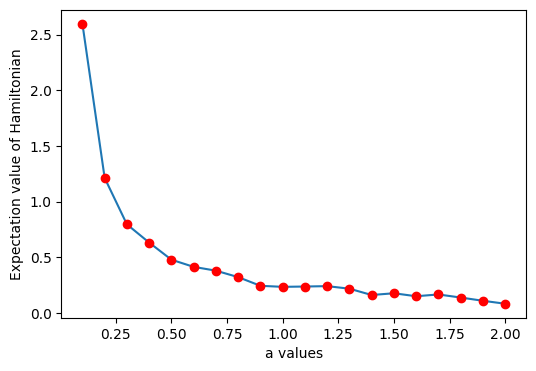

In [11]:
m = 1  # mass
omega = 1  # frequency
N = 20000  # number of Monte Carlo steps
a_values = np.linspace(0.1, 2.0, 20)  # variational parameters

# Trial wavefunction and its derivative
def psi_trial(x, a):
    return np.exp(-a * x**2)

def psi_trial_prime(x, a):
    return -2 * a * x * np.exp(-a * x**2)

# Hamiltonian
def Hamiltonian(x, a):
    kinetic_energy = -0.5 * psi_trial_prime(x, a) / psi_trial(x, a)
    potential_energy = 0.5 * m * omega**2 * x**2
    return kinetic_energy + potential_energy

# Monte Carlo step
def MC_step(x, delta=1.0):
    return x + delta * (2 * np.random.rand() - 1)

x = 0.0 	# Initialize position

E_a = []
# Perform Monte Carlo simulation for each variational parameter
for a in a_values:
    total_energy = 0.0
    for i in range(N):
        x_new = MC_step(x)
        if np.random.rand() < psi_trial(x_new, a) / psi_trial(x, a):
            x = x_new
        total_energy += Hamiltonian(x, a)

    # Calculate expectation value of Hamiltonian
    expectation_energy = total_energy / N
    E_a.append(expectation_energy)

print('Expectation value of Hamiltonian: \n')
for i in range(len(a_values)):
    print(f"a = {a_values[i]}: E = {E_a[i]}")

# Plot E_a vs a
plt.figure(figsize=(6, 4))
plt.plot(a_values, E_a)
plt.plot(a_values, E_a, 'ro')
plt.xlabel('a values')
plt.ylabel('Expectation value of Hamiltonian')
plt.show()


In [14]:
# Simple Harmonic Oscillator
def p(x,a):
    return 0.5 * (x**2 - a**2)

a_list = np.linspace(0, 2, 20)

for a in a_list:
    x = 1
    step_size = 0.8
    x_list = [x]
    accep = 0
    rej = 0 

    for _ in range(20000):
        old_prob = p(x, a)
        x_new = x + (2 * np.random.uniform() - 1) * step_size
        new_prob = p(x_new, a)
        gamma = np.random.uniform()

        if gamma < min(1, new_prob / old_prob):
            x = x_new
            x_list.append(x)
            accep += 1
        else:
            rej += 1

    x_list = np.array(x_list)

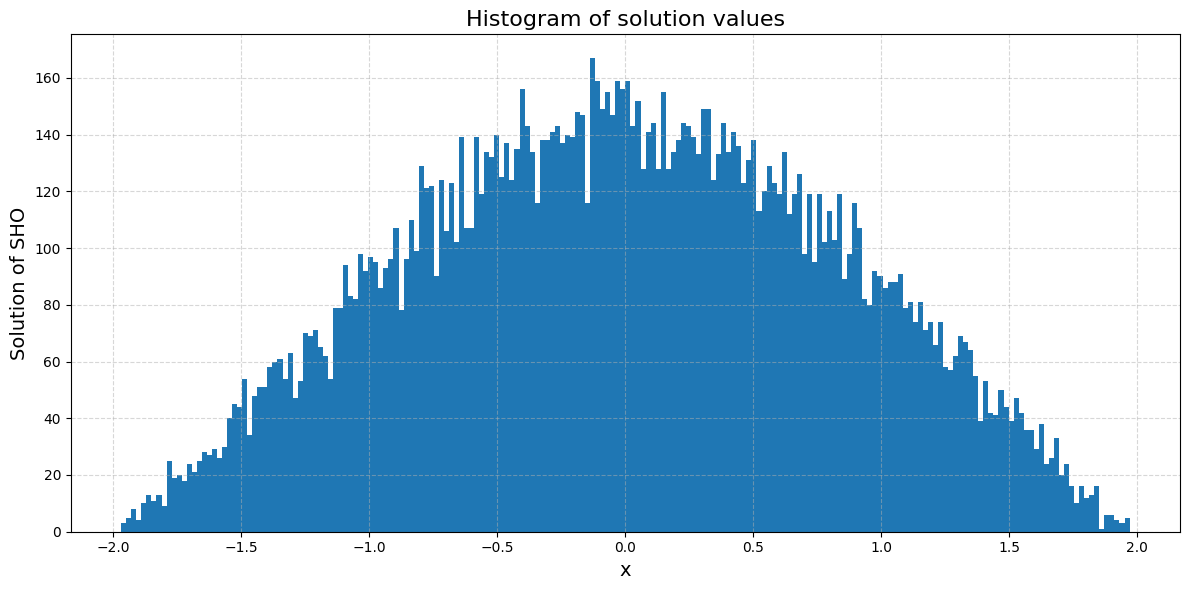

In [16]:
# Plotting histogram of rho_list
plt.figure(figsize=(12, 6))

plt.hist(x_list, bins=200)
plt.xlabel('x', fontsize=14)
plt.ylabel('Solution of SHO', fontsize=14)
plt.title('Histogram of solution values', fontsize=16)
plt.grid(True, which="both", ls="--", alpha=0.5)

plt.tight_layout()
plt.show()